In [13]:
import sys
sys.path.append("..")

from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, KeyedVectors

from src.seeds import Seeds
from src.dataset import Dataset
from src.gensim_word2vec_procrustes_align import smart_procrustes_align_gensim

### Loading tokens
As always, we load the Illinois Appellate Court tokens.

In [14]:
tokens = [e["tokens"] for e in Dataset().load_dataset(year=None, fields={"tokens"})]

print("Total documents:", len(tokens))

### Training a Word2Vec model and saving
We now train a Word2Vec gensim model, filtering out words that appear less than five times, with four workers.
The model is then saved to disk and reloaded.

In [6]:
model = Word2Vec(tokens, min_count=5, workers=4, vector_size=2)

In [ ]:
model_path = "../data/models/vectors/Illinois_appellate_w2v.model"
model.save(model_path)

In [ ]:
model = Word2Vec.load(model_path)

### Finding similar words
The model can find similar words to a given one by considering similar vectors.

In [7]:
for word in ["cocaine", "rape", "gun"]:
    try:
        sim = model.wv.most_similar(word, topn=5)
        print(word, ":\n\t- " + "\n\t- ".join([f"{e[0]} ({round(e[1], 2)})" for e in sim]), "\n")
    except:
        print(word, ": not present in vocab\n")

cocaine : not present in vocab

rape :
	- courts (1.0)
	- route (1.0)
	- comply (1.0)
	- recollection (1.0)
	- aught (1.0) 

gun : not present in vocab



### 2d visualization of interesting words
Reducing dimensionality to two makes possible to visualize datapoints, the original seeds are used, so a small set of narcotics, weapons and investigation terms, otherwise the plot would be too convoluted.

[[ 0.4140879  -0.12378559]]
[[1.7646399 0.6438782]]
[[1.3249394  0.36205226]
 [0.5140231  0.30136898]
 [1.846569   2.3465264 ]]


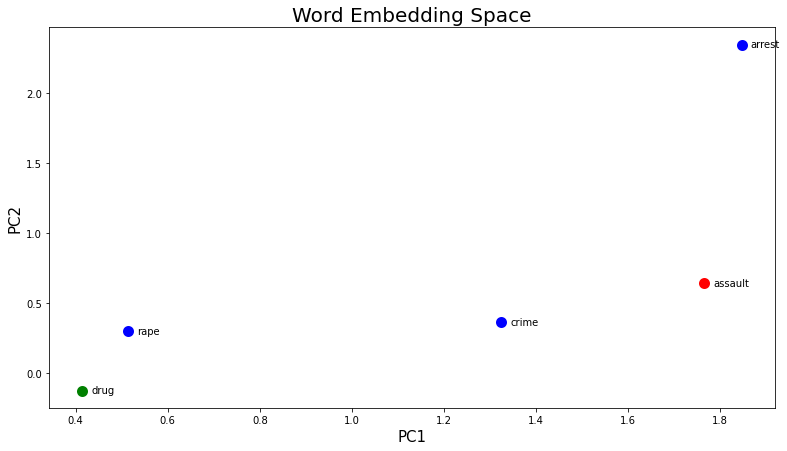

In [12]:
interesting = [list(e) for e in Seeds().get_starting_seeds()]

plt.figure(figsize=(13,7))

colors = ["green", "red", "blue"]

for i, l in enumerate(interesting):
    vectors = []
    for w in l.copy():
        try:
            vectors.append(model.wv[w])
        except:
            l.remove(w)
            
    vectors = np.array(vectors)
    print(vectors)
    
    plt.scatter(vectors[:,0],vectors[:,1],linewidths=5,color=colors[i])
    
    for i, word in enumerate(l):
        plt.annotate(word,xy=(vectors[i,0]+0.02,vectors[i,1]-0.02))
        
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)

plt.title("Word Embedding Space",size=20)

plt.show()